# Calculate FFT Data

Note that this is slow! So only run once! Last time it was 2m45.4s

In [8]:
data_files = [
    (-55.5, r'Data\2022-05-05\103531-Weak_rabi_time_traces\103549-SSlongOsci_weak_time_gpu\data.h5'),
    (-55.0, r'Data\2022-05-05\103531-Weak_rabi_time_traces\105950-SSlongOsci_weak_time_gpu\data.h5'),
    (-54.0, r'Data\2022-05-05\103531-Weak_rabi_time_traces\112357-SSlongOsci_weak_time_gpu\data.h5'),
    (-53.0, r'Data\2022-05-05\103531-Weak_rabi_time_traces\114804-SSlongOsci_weak_time_gpu\data.h5'),
    (-52.0, r'Data\2022-05-05\103531-Weak_rabi_time_traces\121220-SSlongOsci_weak_time_gpu\data.h5'),
    (-51.0, r'Data\2022-05-05\103531-Weak_rabi_time_traces\123629-SSlongOsci_weak_time_gpu\data.h5'),
    (-50.0, r'Data\2022-05-05\103531-Weak_rabi_time_traces\130033-SSlongOsci_weak_time_gpu\data.h5'),
    (-49.0, r'Data\2022-05-05\103531-Weak_rabi_time_traces\134113-SSlongOsci_weak_time_gpu\data.h5'),
    (-48.0, r'Data\2022-05-05\103531-Weak_rabi_time_traces\140526-SSlongOsci_weak_time_gpu\data.h5'),
    (-47.0, r'Data\2022-05-05\103531-Weak_rabi_time_traces\142920-SSlongOsci_weak_time_gpu\data.h5'),
    (-46.0, r'Data\2022-05-05\103531-Weak_rabi_time_traces\145318-SSlongOsci_weak_time_gpu\data.h5')
]

In [15]:
from sqdtoolz.Utilities.FileIO import FileIOReader
test_data = FileIOReader(r'Z:\Data\2022_04_13_Oxford_Arka21_round2\2022-05-05\103531-Weak_rabi_time_traces\103549-SSlongOsci_weak_time_gpu\data.h5')

In [16]:
test_data.param_names

['SSWeakReadDriveAmplitude', 'repetition', 'sample']

In [17]:
test_arr = test_data.get_numpy_array()

In [18]:
test_arr.shape

(5, 4000, 7500, 2)

## concatenate the repetitions first, instead of averageing the FFT of each repetition

In [47]:
test_arr2 = np.concatenate(test_arr[3][:,:,:], axis=0)
test_arr2.shape

(30000000, 2)

In [48]:
repsSamplesComplex =test_arr2[:,0]+ 1j*test_arr2[:,1]
sample_rate =62500000/8

freqs = np.fft.fftfreq(repsSamplesComplex.shape[-1], 1.0/sample_rate)[1:]
#
#Take FFT and discard 0-frequency term
arr_fft = np.fft.fft(repsSamplesComplex)[1:]
# arr_fft = np.mean(np.abs(arr_fft), axis=0)[1:]
#
#Reorder the FFT so that frequencies are in ascending order...
ind = int(freqs.size/2)
freqs = np.concatenate([freqs[ind:], freqs[:ind]])
arr_fft = np.concatenate([arr_fft[ind:], arr_fft[:ind]])


(0.0, 1000000.0)

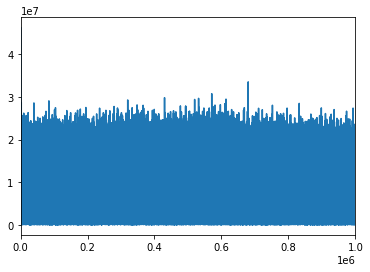

In [46]:
plt.plot(freqs, np.abs(arr_fft))
plt.xlim(-1e6, 2e6)

(0.0, 1000000.0)

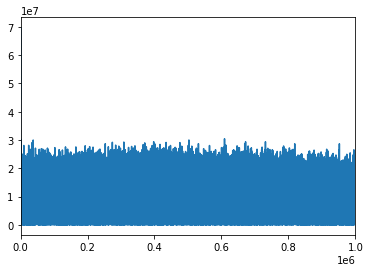

In [49]:
plt.plot(freqs, np.abs(arr_fft))
plt.xlim(0, 1e6)

## try to plot the real and imaginary part of the averaged FFT

In [71]:
repsSamplesComplex =test_arr[3][:,:,0]+ 1j*test_arr[3][:,:,1]
sample_rate =62500000/8

freqs = np.fft.fftfreq(repsSamplesComplex.shape[-1], 1.0/sample_rate)[1:]
#
#Take FFT and discard 0-frequency term
arr_fft = np.fft.fft(repsSamplesComplex)[1:]
arr_fft_mod = np.mean(np.abs(arr_fft), axis=0)[1:]
#
#Reorder the FFT so that frequencies are in ascending order...
ind = int(freqs.size/2)
freqs = np.concatenate([freqs[ind:], freqs[:ind]])
arr_fft = np.concatenate([arr_fft[ind:], arr_fft[:ind]])
# arr_fft_mod = np.concatenate([arr_fft_mod[ind:], arr_fft_mod[:ind]])


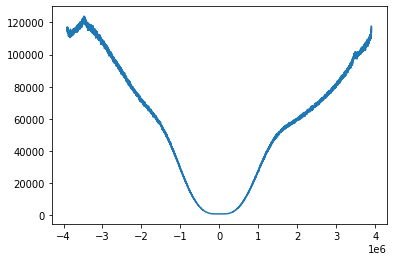

In [72]:
plt.plot(freqs, arr_fft_mod)
# plt.xlim(0, 1e6)

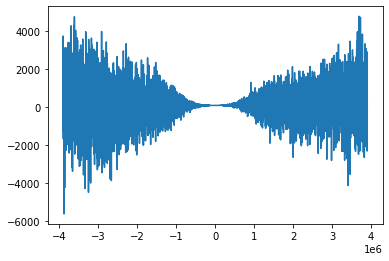

In [68]:
plt.plot(freqs, np.mean(np.real(arr_fft), axis=0)[1:])
# plt.xlim(0, 1e6)

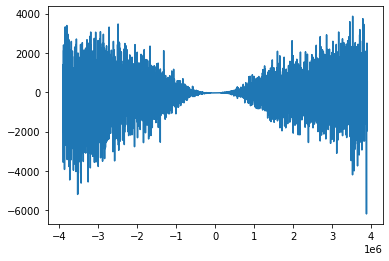

In [69]:
plt.plot(freqs, np.mean(np.imag(arr_fft), axis=0)[1:])

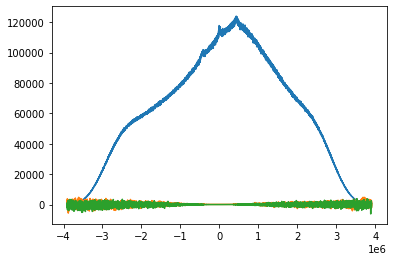

In [70]:
plt.plot(freqs, arr_fft_mod)
plt.plot(freqs, np.mean(np.real(arr_fft), axis=0)[1:])
plt.plot(freqs, np.mean(np.imag(arr_fft), axis=0)[1:])

In [2]:
from sqdtoolz.Utilities.FileIO import FileIOReader
import matplotlib.pyplot as plt
import numpy as np

def get_fft(repsSamplesComplex, sample_rate):
    freqs = np.fft.fftfreq(repsSamplesComplex.shape[-1], 1.0/sample_rate)[1:]
    #
    #Take FFT and discard 0-frequency term
    arr_fft = np.fft.fft(repsSamplesComplex)[1:]
    arr_fft = np.mean(np.abs(arr_fft), axis=0)[1:]
    #
    #Reorder the FFT so that frequencies are in ascending order...
    ind = int(freqs.size/2)
    freqs = np.concatenate([freqs[ind:], freqs[:ind]])
    arr_fft = np.concatenate([arr_fft[ind:], arr_fft[:ind]])
    #
    return freqs, arr_fft

arr_amps = []
cav_vals = []
for cur_f in range(len(data_files)):
    cur_data = FileIOReader(data_files[cur_f][1])
    cav_vals += [data_files[cur_f][0]]
    amplVals = cur_data.param_vals[0]
    #
    arr = cur_data.get_numpy_array()
    #
    arr_ffts = []
    for m in range(amplVals.size):
        freqs, arr_fft = get_fft(arr[m][:,:,0]+1j*arr[m][:,:,1], 62500000/8)
        arr_ffts += [arr_fft]
    arr_amps += [np.array(arr_ffts)]
    #
    cur_data.release()
    del cur_data

data_full = np.array(arr_amps)

from sqdtoolz.Utilities.FileIO import FileIOWriter

data_fullExt = np.reshape(data_full, tuple(list(data_full.shape) + [1]))

data_pkt = {
    'data' : {'fftAmpl' : data_fullExt},
    'parameters' : ['CavPower', 'DriveAmp', 'Frequency'],
    'parameter_values' : {
        'CavPower' : np.array(cav_vals),
        'DriveAmp' : np.array(amplVals),
        'Frequency' : np.array(freqs)
    }
}

data_file = FileIOWriter('osc_data_fftAbs.h5', store_timestamps=False)
data_file.push_datapkt(data_pkt, [])
data_file.close()

# Analyse the FFT data

First load the data

In [1]:
from sqdtoolz.Utilities.FileIO import FileIOReader
import numpy as np

dataFFTs = FileIOReader('osc_data_fftAbs.h5')
arrFFTs = dataFFTs.get_numpy_array()/10000 # scale the y axis for the final figure
dataFFTs.param_names

['CavPower', 'DriveAmp', 'Frequency']

The background is funny and is fitted as an overall feature (i.e. to ignore the precious peak features) via a large-degree polynomial to capture the curves/wiggles...

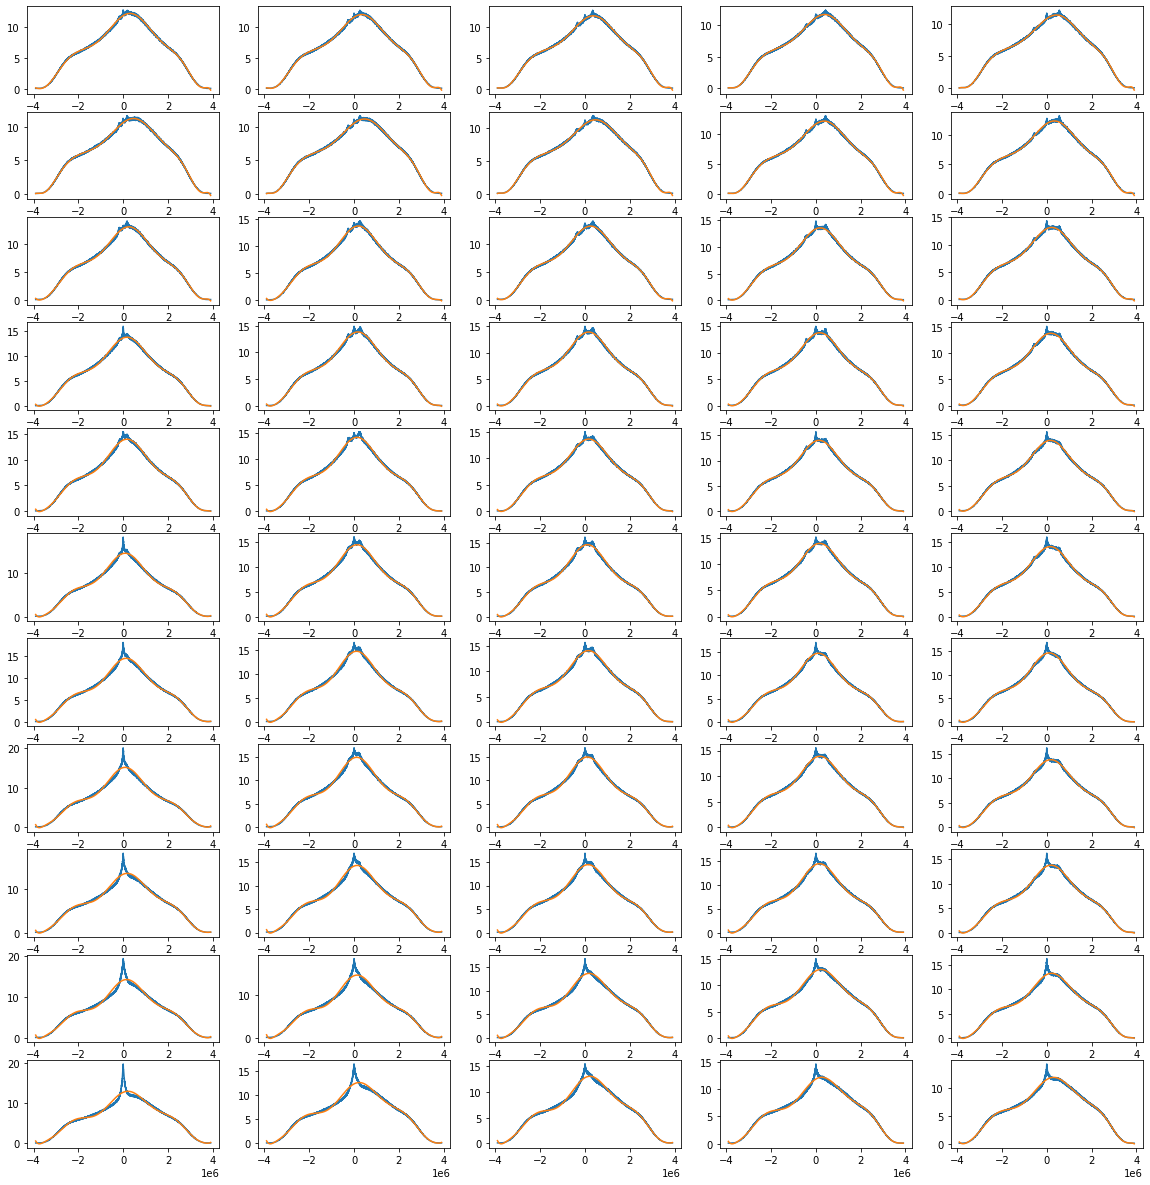

In [5]:
import matplotlib.pyplot as plt

cav_powers = dataFFTs.param_vals[0]
drive_amps = dataFFTs.param_vals[1]
ffts_freqs = dataFFTs.param_vals[2]

fig, axs = plt.subplots(nrows=cav_powers.size, ncols=drive_amps.size)
fig.set_figwidth(20); fig.set_figheight(21)

data_back_subs = []
for ind_pwr in range(cav_powers.size):
    cur_back_subs = []
    for ind_amp in range(drive_amps.size):
        fft_vals = arrFFTs[ind_pwr][ind_amp][:,0]
        axs[ind_pwr][ind_amp].plot(ffts_freqs, fft_vals)
        #Perform and plot polynomial fitting
        fitVals = np.polyfit(ffts_freqs, fft_vals, 12)
        axs[ind_pwr][ind_amp].plot(ffts_freqs, np.poly1d(fitVals)(ffts_freqs))
        cur_back_subs += [fft_vals - np.poly1d(fitVals)(ffts_freqs)]
    data_back_subs += [cur_back_subs]
data_back_subs = np.array(data_back_subs)

Now crush the central peak with a sharp peaking function

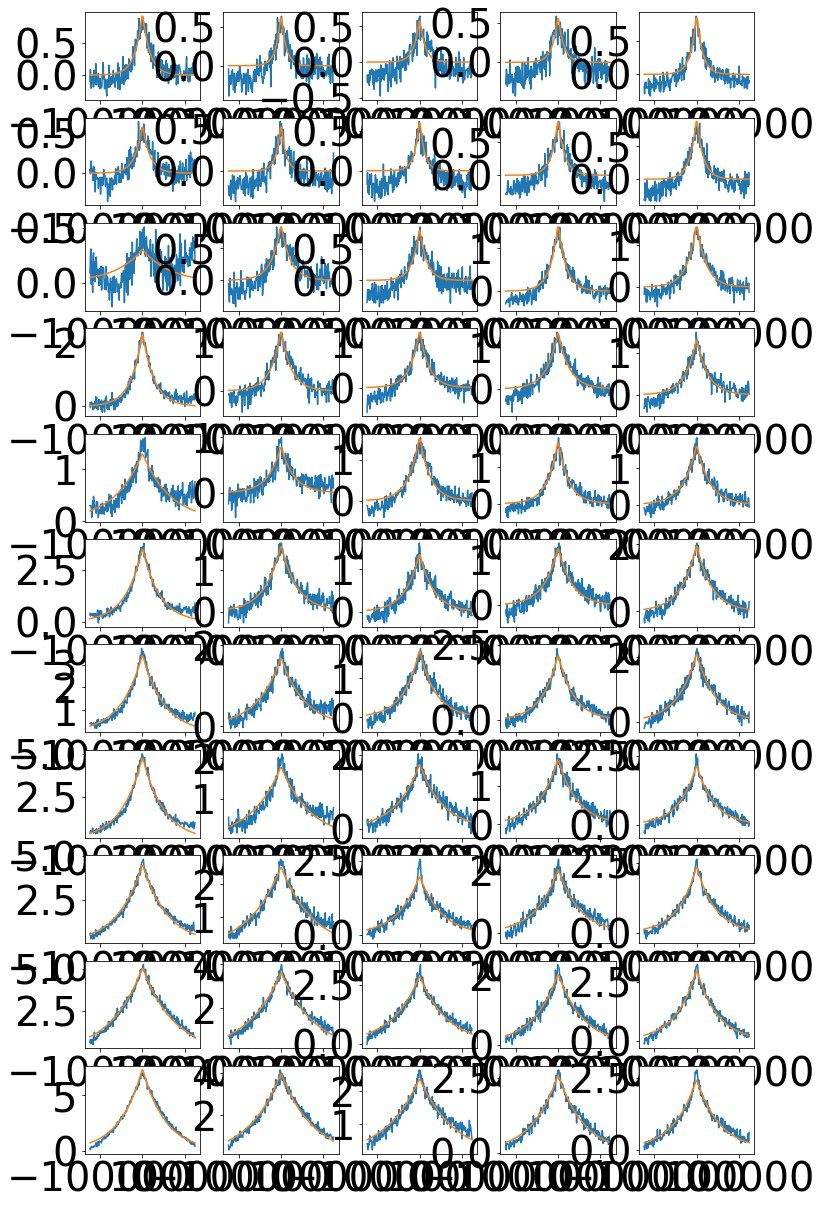

In [64]:
import scipy.optimize

def func(x, pWidth, pHeight):
    return pHeight * np.exp( -np.abs(x/pWidth) )

fig, axs = plt.subplots(nrows=cav_powers.size, ncols=drive_amps.size)
fig.set_figwidth(12); fig.set_figheight(21)

ffts_freqs = dataFFTs.param_vals[2]
xInds = np.where((ffts_freqs < 125e3) & (ffts_freqs > -125e3))[0]

data_back_subs2 = []
for ind_pwr in range(cav_powers.size):
    cur_back_subs = []
    for ind_amp in range(drive_amps.size):
        fft_vals = data_back_subs[ind_pwr][ind_amp]
        axs[ind_pwr][ind_amp].plot(ffts_freqs[xInds], fft_vals[xInds])
        #Perform and plot polynomial fitting
        popt, pcov = scipy.optimize.curve_fit(func, ffts_freqs[xInds], fft_vals[xInds], [50e3, 1], bounds=([10e-9, 0], [np.inf, np.inf]), method='trf' )
        fitVals = func(ffts_freqs[xInds], *popt)
        #
        axs[ind_pwr][ind_amp].plot(ffts_freqs[xInds], func(ffts_freqs[xInds], *popt))
        cur_back_subs += [data_back_subs[ind_pwr][ind_amp] - func(ffts_freqs, *popt)]
    data_back_subs2 += [cur_back_subs]
data_back_subs2 = np.array(data_back_subs2)

Save the data

In [65]:
import json

save_data = {
    'cav_powers' : cav_powers.tolist(),
    'drive_amps' : drive_amps.tolist(),
    'freqs' : ffts_freqs.tolist(),
    'data' : data_back_subs2.tolist()
}

with open('fft_data.json', 'w') as outfile:
    json.dump(save_data, outfile)

# Plot the FFT data

Load the data

In [5]:
import numpy as np
import json
import matplotlib.pyplot as plt

with open('fft_data.json') as json_file:
    data = json.load(json_file)

drive_amps = np.array(data['drive_amps'])
cav_powers = np.array(data['cav_powers'])
ffts_freqs = np.array(data['freqs'])
data_back_subs = np.array(data['data'])

Plot the background-subtracted traces over all cavity powers - it should be flat now...

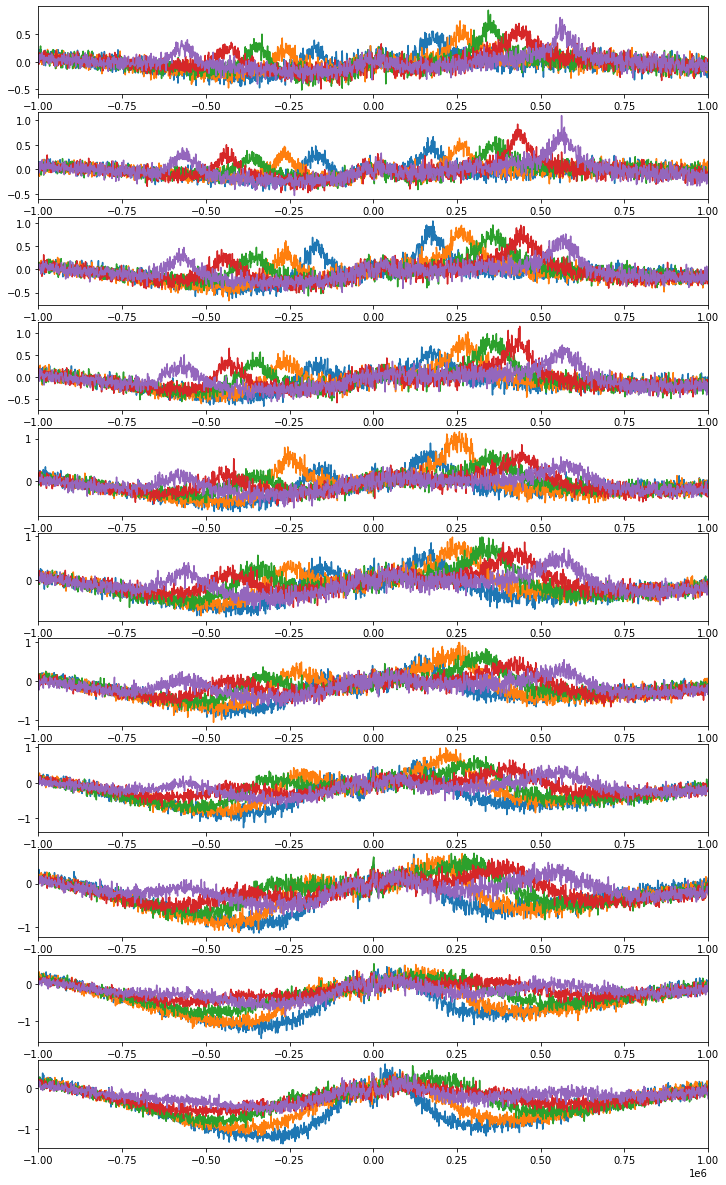

In [6]:
fig, axs = plt.subplots(nrows=cav_powers.size, ncols=1)
fig.set_figwidth(12); fig.set_figheight(21)

for ind_pwr in range(cav_powers.size):
    cur_back_subs = []
    for ind_amp in range(drive_amps.size):
        fft_vals = data_back_subs[ind_pwr][ind_amp]
        axs[ind_pwr].plot(ffts_freqs, fft_vals)
    axs[ind_pwr].set_xlim([-1e6,1e6])

Now fit those peaks as best as possible...

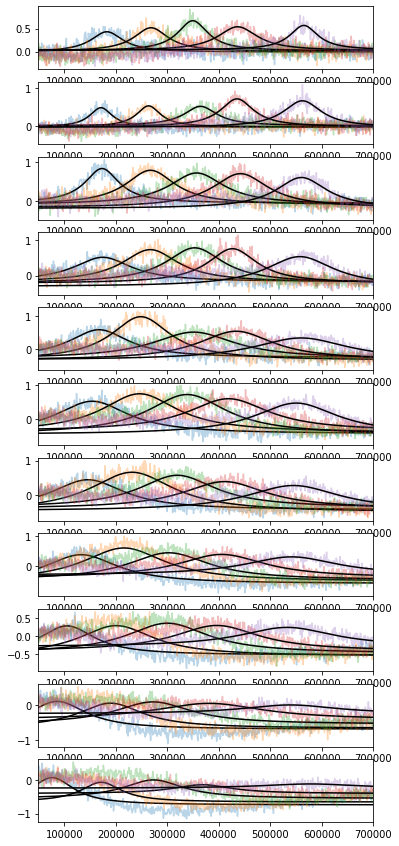

In [7]:
from sqdtoolz.Utilities.DataFitting import DFitPeakLorentzian

plot_num = cav_powers.size
freq_range = [50e3,700e3]

fig, axs = plt.subplots(nrows=plot_num, ncols=1)
fig.set_figwidth(6); fig.set_figheight(15)

def func(x, a, w, x0, c):
    return a * (0.5*w)**2/((x-x0)**2 + (0.5*w)**2) + c

fit_amps = []
fit_wids = []
fit_cens = []
fit_offs = []
freq_inds = np.where( (ffts_freqs > freq_range[0]) & (ffts_freqs < freq_range[1]) )[0]
for ind_pwr in range(plot_num):
    cur_fit_amps = []
    cur_fit_wids = []
    cur_fit_cens = []
    cur_fit_offs = []
    for ind_amp in range(drive_amps.size):
        #Empirically start restricting the starting frequency for the peaks of higher drive amplitudes...
        freq_inds_fits = np.where( (ffts_freqs > freq_range[0] + ind_amp*100e3) & (ffts_freqs < freq_range[1]) )[0]

        fft_vals = data_back_subs[ind_pwr][ind_amp]
        dPkt = DFitPeakLorentzian().get_fitted_plot(ffts_freqs[freq_inds_fits], fft_vals[freq_inds_fits], dontplot=True)
        cur_fit_amps += [dPkt['amplitude']]
        cur_fit_wids += [dPkt['width']]
        cur_fit_cens += [dPkt['centre']]
        cur_fit_offs += [dPkt['offset']]

        axs[ind_pwr].plot(ffts_freqs[freq_inds], fft_vals[freq_inds], alpha=0.3)
        axs[ind_pwr].plot(ffts_freqs[freq_inds], func(ffts_freqs[freq_inds], dPkt['amplitude'], dPkt['width'], dPkt['centre'], dPkt['offset']), 'k')
    fit_amps += [cur_fit_amps]
    fit_wids += [cur_fit_wids]
    fit_cens += [cur_fit_cens]
    fit_offs += [cur_fit_offs]
    axs[ind_pwr].set_xlim([0.05e6,0.7e6])

Now prepare the paper figure...

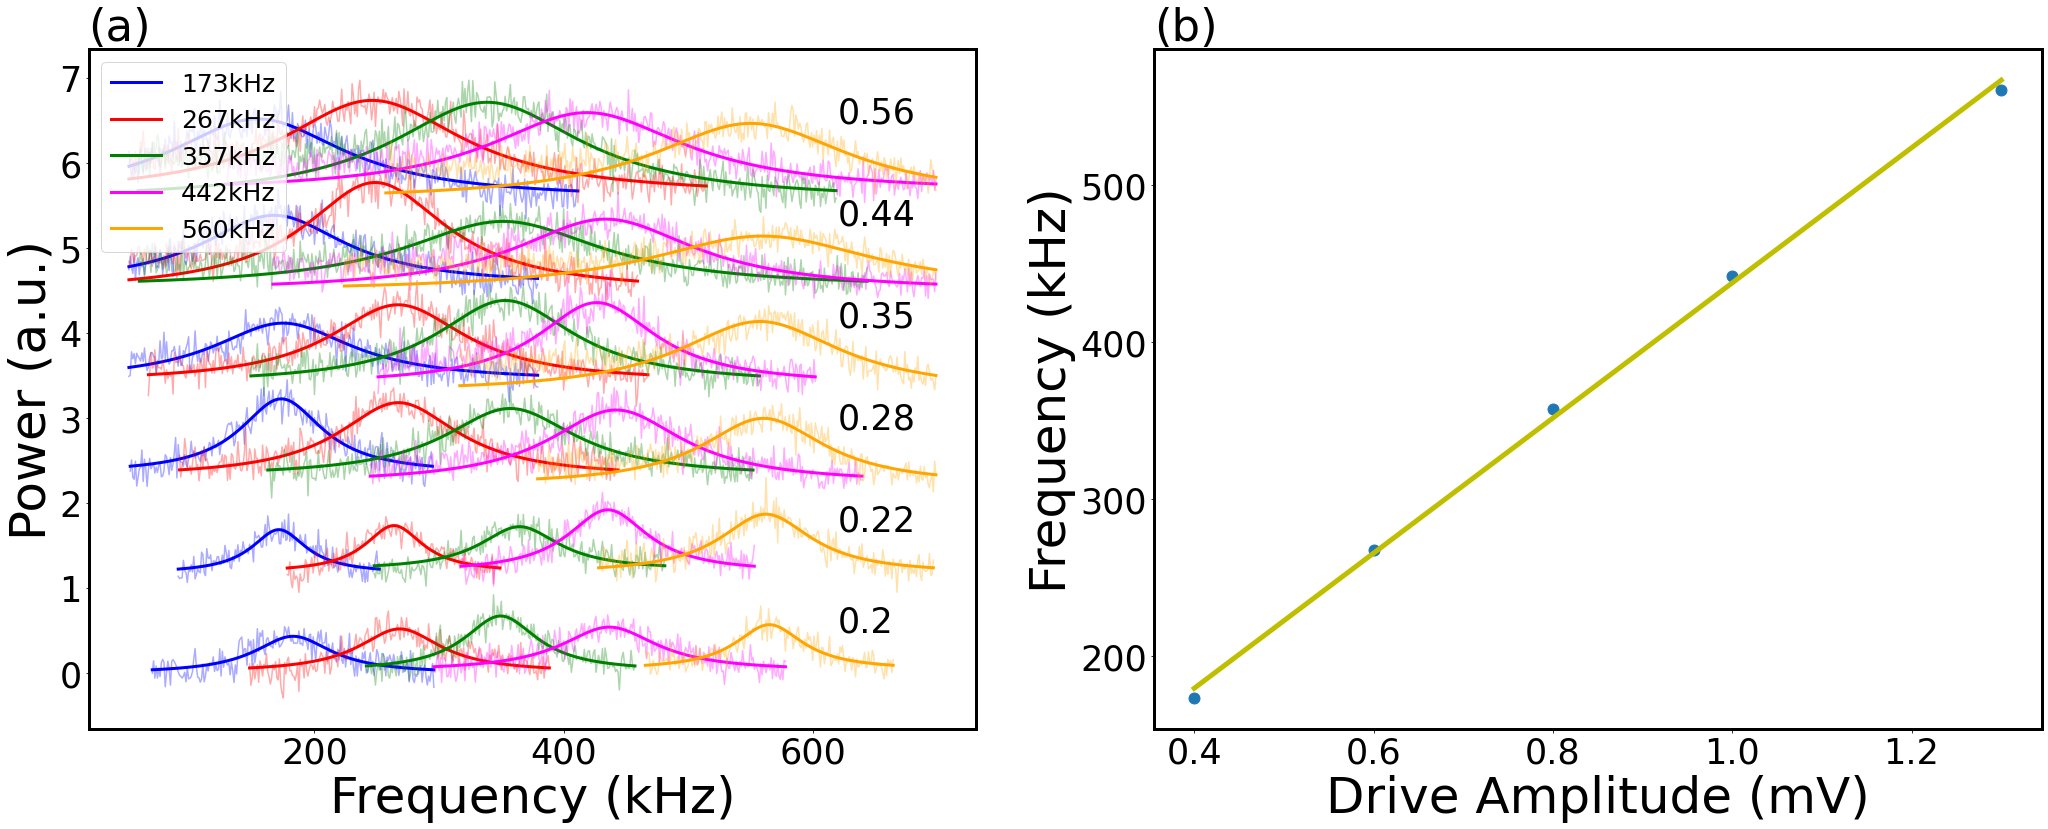

In [12]:
#2D Fitted Rabi parameters
rabi2DfitGrad = 1
rabi2DfitOffset = 0
#Plotting parameters
plot_num = 6 #cav_powers.size
freq_range = [50e3,700e3]
plot_offset = 1.2
#Toggle the use of a scatter plot
use_scatter = False
decimation_fac = 16

fig, ax = plt.subplots(1,2)
fig.set_figwidth(35); fig.set_figheight(12.5)

def func(x, a, w, x0, c):
    return a * (0.5*w)**2/((x-x0)**2 + (0.5*w)**2) + c

colours = ['blue', 'red', 'green', 'magenta', 'orange']

for ind_pwr in range(plot_num):
    for ind_amp in range(drive_amps.size):
        fft_vals = data_back_subs[ind_pwr][ind_amp]

        freq_plot = [ fit_cens[ind_pwr][ind_amp] - 1.5*fit_wids[ind_pwr][ind_amp], fit_cens[ind_pwr][ind_amp] + 1.5*fit_wids[ind_pwr][ind_amp] ]
        freq_inds = np.where( (ffts_freqs > max(freq_range[0], freq_plot[0])) & (ffts_freqs < min(freq_range[1], freq_plot[1])) )[0]

        if use_scatter:
            ax[0].scatter(ffts_freqs[freq_inds][::decimation_fac]/1e3, fft_vals[freq_inds][::decimation_fac] + ind_pwr*plot_offset,
                             s=80, edgecolors=colours[ind_amp], facecolors='none',  marker='o', label='_nolegend_')
        else:
            ax[0].plot(ffts_freqs[freq_inds]/1e3, fft_vals[freq_inds] + ind_pwr*plot_offset, color=colours[ind_amp], alpha=0.33, label='_nolegend_')

        ax[0].plot(ffts_freqs[freq_inds]/1e3, func(ffts_freqs[freq_inds], fit_amps[ind_pwr][ind_amp], fit_wids[ind_pwr][ind_amp], fit_cens[ind_pwr][ind_amp], fit_offs[ind_pwr][ind_amp]) + ind_pwr*plot_offset, 
                             color=colours[ind_amp], linewidth=3)
        
    # ax.set_xlim([0.05e6,0.7e6])

#Legend for the Drive Amplitudes
# drive_val_rabis = np.round( ( drive_amps * rabi2DfitGrad + rabi2DfitOffset )/1e3 ,-1).astype(dtype=np.int32)
drive_val_rabis = np.round( np.array(fit_cens[2][:])/1.0e3 ,1).astype(dtype=np.int32)
drive_val_rabis = [f'{x}kHz' for x in drive_val_rabis]
ax[0].legend(drive_val_rabis, loc='upper left', fontsize = 25)
ax[0].set_xlabel('Frequency (kHz)', fontsize = 50)
ax[0].set_ylabel('Power (a.u.)', fontsize = 50)
ax[0].set_title('(a)', fontsize = 45, loc= 'left')
#Labels for Cavity Powers
for m in range(plot_num):
    # str_val = f'{cav_powers[m]}dB' #7897.058823529412 * 10**((dbm+8)/10.0)
    str_val = f'{np.round(7897.058823529412 * 10**((cav_powers[m]+9.5)/10.0),2)}'
    ax[0].text(620, plot_offset*(m+0.4), str_val, fontsize=35)


# handels, labels = plt.gca().get_legend_handles_labels()
# ax[0].legend(handels[::-1], labels[::-1], fontsize= 18, loc=1)

# Set general font size
plt.rcParams['font.size'] = '10'

# Set tick font size
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
	label.set_fontsize(35)

# Set axis width
for side in ax[0].spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax[0].spines[side].set_linewidth(3)  




#########################################################################
# # subfigure 2
#########################################################################

line_fit = np.polyfit(drive_amps*1e3, np.array(fit_cens[2][:])/1.0e3, 1)
line_fit = np.poly1d(line_fit)



ax[1].scatter(drive_amps*1e3, np.array(fit_cens[2][:])/1.0e3, s=120, marker='o')
ax[1].plot(drive_amps*1e3, line_fit(drive_amps*1e3), linewidth=5, color='y')

ax[1].set_ylabel('Frequency (kHz)', fontsize=50)
ax[1].set_xlabel('Drive Amplitude (mV)', fontsize=50)
ax[1].set_title('(b)', fontsize = 45, loc= 'left')




# handels, labels = plt.gca().get_legend_handles_labels()
# ax[1].legend(handels[::-1], labels[::-1], fontsize= 18, loc=1)

# Set general font size
plt.rcParams['font.size'] = '40'

# Set tick font size
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
	label.set_fontsize(35)

# Set axis width
for side in ax[1].spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax[1].spines[side].set_linewidth(3)  


fig.savefig('weak_rabi_spec_round2.pdf')



In [11]:
np.array(fit_wids)/1e3

array([[ 76.01325172,  80.70111922,  72.02694607,  94.49428349,
         66.74535457],
       [ 53.85337066,  57.16719243,  78.32703611,  79.03395368,
         90.17944944],
       [ 80.97527112, 117.83445608, 130.12258872, 132.18801324,
        121.04119582],
       [136.99533099, 133.82169832, 136.26972511, 117.18167304,
        160.96534989],
       [141.27460112, 140.64409842, 195.17285707, 178.14175244,
        224.0625    ],
       [171.40229582, 179.4842759 , 187.40585741, 192.86831261,
        195.78932498],
       [172.84918594, 198.35178028, 182.21153809, 197.82043504,
        224.0625    ],
       [175.4643473 , 195.49182626, 191.8789751 , 207.62553767,
        220.80533176],
       [131.57630936, 178.41338213, 193.86125511, 201.87226989,
        224.0625    ],
       [138.30504209, 154.29345917, 182.64626889, 258.31985225,
        224.0625    ],
       [103.34026157,  96.03771284, 142.18244606, 137.36827811,
        224.0625    ]])

In [ ]:
array([203.79258294, 283.54515056, 363.29771818, 443.0502858 ,
       562.67913723])

In [57]:
drive_amps

array([0.0004, 0.0006, 0.0008, 0.001 , 0.0013])

Text(0.5, 0, 'Drive Amplitude (mV)')

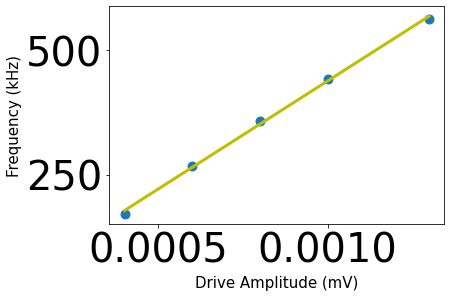

In [54]:
fig, ax= plt.subplots(1)

line_fit = np.polyfit(drive_amps, np.array(fit_cens[2][:])/1.0e3, 1)
line_fit = np.poly1d(line_fit)



ax.scatter(drive_amps, np.array(fit_cens[2][:])/1.0e3, s=80, marker='o')
ax.plot(drive_amps, line_fit(drive_amps), linewidth=3, color='y')

ax.set_ylabel('Frequency (kHz)', fontsize=15)
ax.set_xlabel('Drive Amplitude (mV)', fontsize=15)
